# Data Set

In [4]:
import os
import pandas as pd

In [5]:
mypath= 'Dataset_Daun/'

In [6]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [7]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Jeruk               10
Jinten              10
Melati              10
Sirih Merah          7
Sirsak              10
Sri Rejeki Putih    10
dtype: int64

In [8]:
df.head()

,path,file_name,tag
0,Dataset_Daun/Jeruk\1.jpeg,1.jpeg,Jeruk
1,Dataset_Daun/Jeruk\10.jpeg,10.jpeg,Jeruk
2,Dataset_Daun/Jeruk\2.jpeg,2.jpeg,Jeruk
3,Dataset_Daun/Jeruk\3.jpeg,3.jpeg,Jeruk
4,Dataset_Daun/Jeruk\4.jpeg,4.jpeg,Jeruk


# Memisah Data Set Menjadi 3 Bagian

1. Data Train -> Data Latih
2. Data Validation -> Validasi untuk data latih
3. Data Test -> Untuk menguji model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df['path']
y= df['tag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [13]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [14]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 45
val size 6
test size 6


In [15]:
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag             
test        Jeruk               2
            Melati              3
            Sirih Merah         1
train       Jeruk               8
            Jinten              9
            Melati              7
            Sirih Merah         5
            Sirsak              8
            Sri Rejeki Putih    8
validation  Jinten              1
            Sirih Merah         1
            Sirsak              2
            Sri Rejeki Putih    2
dtype: int64 




,path,tag,set
14,Dataset_Daun/Sirsak\46.jpeg,Sirsak,train
40,Dataset_Daun/Sirsak\43.jpeg,Sirsak,train
37,Dataset_Daun/Melati\28.jpeg,Melati,train


In [16]:
import shutil
from tqdm.notebook import tqdm as tq

In [17]:
datasource_path = "Dataset_Daun/"
dataset_path = "dataset/"

In [18]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])     
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    #copy file from source to dest
    if os.path.exists(file_dest) == True:
        shutil.copy2(file_path,file_dest)

# Data Generator

In [19]:
import tensorflow as tf

In [20]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
epoch = 1000

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [40]:
train_generator = train_datagen.flow_from_directory('dataset/train/',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('dataset/validation/',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('dataset/test/',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 45 images belonging to 6 classes.
Found 6 images belonging to 4 classes.
Found 6 images belonging to 3 classes.


In [41]:
print(labels)

dict_keys(['Jeruk', 'Jinten', 'Melati', 'Sirih Merah', 'Sirsak', 'Sri Rejeki Putih'])


In [42]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [43]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


# Convolutional Neural Networks

In [45]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [46]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation('softmax'))

# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Compiling Model.......


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 150, 150, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      36896     
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 64)        1

# Prebuild pemodelan

In [55]:
from tensorflow.keras.applications import MobileNetV2

# get base models
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)

9412608/9406464 [==============================] - ETA:  - ETA: 24 - ETA: 18 - ETA: 18 - ETA: 16 - ETA: 14 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 12 - ETA: 15 - ETA: 18 - ETA: 21 - ETA: 24 - ETA: 26 - ETA: 29 - ETA: 32 - ETA: 34 - ETA: 36 - ETA: 39 - ETA: 42 - ETA: 44 - ETA: 47 - ETA: 47 - ETA: 52 - ETA: 53 - ETA: 54 - ETA: 56 - ETA: 57 - ETA: 59 - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - E

In [56]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

In [57]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation="relu")(x)

predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

__________________________________________________________________________________________________
block_8_project (Conv2D)        (None, 10, 10, 64)   24576       block_8_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_8_project_BN (BatchNormal (None, 10, 10, 64)   256         block_8_project[0][0]            
__________________________________________________________________________________________________
block_8_add (Add)               (None, 10, 10, 64)   0           block_7_add[0][0]                
                                                                 block_8_project_BN[0][0]         
__________________________________________________________________________________________________
block_9_expand (Conv2D)         (None, 10, 10, 384)  24576       block_8_add[0][0]                
__________________________________________________________________________________________________
block_9_ex

__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 3)            3075        dense_2[0][0]                    
Total params: 3,572,803
Trainable params: 3,538,691
Non-trainable params: 34,112
__________________________________________________________________________________________________


In [59]:
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


In [63]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "medium_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)    

Saving Model At model\medium_project\model.h5...


In [64]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')    

Accuracy on training data: 0.3333 
Loss on training data: 1.2617 

Accuracy on test data: 0.5000 
Loss on test data: 1.3191 



# Pendeteksian Gambar

In [65]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [66]:
# Parameters
input_size = (150,150)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['Jeruk', 'Jinten', 'Melati', 'Sirih Merah', 'Sirsak','Sri Rejeki Putih']

In [67]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [68]:
from tensorflow.keras.models import load_model

In [69]:
MODEL_PATH = 'model/medium_project/model.h5'
model = load_model(MODEL_PATH,compile=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


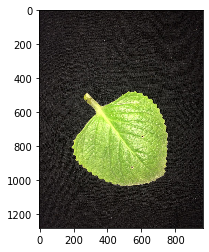

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
img = mpimg.imread('Contoh.jpeg') 
imgplot = plt.imshow(img) 
plt.show() 

In [74]:
im = Image.open('Contoh.jpeg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

Jinten 0.5219157


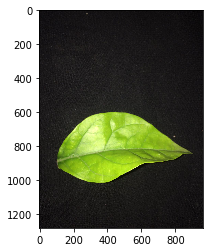

In [113]:
img = mpimg.imread('Contoh2.jpeg') 
imgplot = plt.imshow(img) 
plt.show() 

In [112]:
im = Image.open('Contoh2.jpeg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

Melati 0.41288608


In [145]:
import cv2
img = cv2.imread('dataset/train/sirih merah/31.jpeg',0)
ret, thresh = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
 
cv2.imshow('biner.jpeg', thresh)
cv2.imwrite('biner.jpeg', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [144]:
im = Image.open('biner.jpeg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

Jinten 0.43169215


In [150]:
y

array([[0.29950336, 0.43169215, 0.2688045 ]], dtype=float32)

In [151]:
print( labels[np.argmax(y)], np.max(y) )

Jinten 0.43169215
